In [1]:
import fastf1
import fastf1.plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
race = fastf1.get_session(2023, 'Azerbaijan', 'R')
race.load()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\abdul\AppData\Local\Temp\fastf1.
	Size: 458.07 MB
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.1.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '16', '14', '55', '44', '18', '63', '4', 

In [3]:
driver_laps = race.laps.pick_driver('HAM').pick_quicklaps().reset_index()
# Convert laptime to seconds
driver_laps['LapTime'] = driver_laps['LapTime'].apply(lambda x: x.total_seconds())

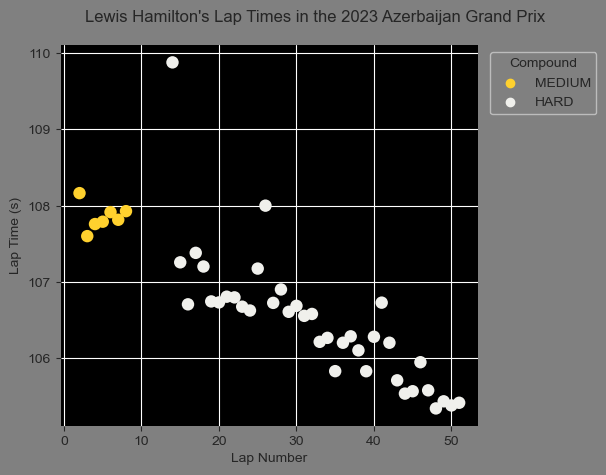

In [4]:
sns.set_style("ticks", rc = {"axes.facecolor": "black", "figure.facecolor": "grey"})
fig, ax = plt.subplots()

sns.scatterplot(data = driver_laps, x = "LapNumber", y = "LapTime",
                ax = ax, hue = "Compound", palette = fastf1.plotting.COMPOUND_COLORS,
                s = 80, linewidth = 0, legend = "auto")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("Lewis Hamilton's Lap Times in the 2023 Azerbaijan Grand Prix")
plt.grid(color = "w", which = 'major', axis = 'both')
sns.despine(left = True, bottom = True)
# get the plot's legend
leg = ax.get_legend()
# put the legend out of the plot
leg.set_bbox_to_anchor((1.3, 1))
# set the legend's background to transparent
frame = leg.get_frame()
frame.set_facecolor('none')
plt.tight_layout()
plt.show()